In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
pd.set_option('display.max_colwidth', 50)

In [2]:
df = pd.read_csv(r'C:\Users\efere\Downloads\Dataset\rideshare_kaggle.csv')

In [3]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [5]:
print(list(df.columns))

['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'short_summary', 'long_summary', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']


In [6]:
df.drop(['temperatureHighTime', 'temperatureLowTime',  'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 
        'temperatureMinTime', 'timestamp', 'temperatureMaxTime', 'apparentTemperatureMinTime', 
        'apparentTemperatureMaxTime', 'windGustTime', 'sunriseTime', 'sunsetTime'], axis=1, inplace=True)

In [7]:
df.head()

,id,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,...,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,...,0,10.000,303.8,0.30,0.1276,1544979600,39.89,43.68,33.73,38.07
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,...,0,4.786,291.1,0.64,0.1300,1543251600,40.49,47.30,36.20,43.92
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,...,0,10.000,315.7,0.68,0.1064,1543338000,35.36,47.55,31.04,44.12
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,...,0,10.000,291.1,0.75,0.0000,1543507200,34.67,45.03,30.30,38.53
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,...,0,10.000,347.7,0.72,0.0001,1543420800,33.10,42.18,29.11,35.75


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 45 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       693071 non-null  object 
 1   hour                     693071 non-null  int64  
 2   day                      693071 non-null  int64  
 3   month                    693071 non-null  int64  
 4   datetime                 693071 non-null  object 
 5   timezone                 693071 non-null  object 
 6   source                   693071 non-null  object 
 7   destination              693071 non-null  object 
 8   cab_type                 693071 non-null  object 
 9   product_id               693071 non-null  object 
 10  name                     693071 non-null  object 
 11  price                    637976 non-null  float64
 12  distance                 693071 non-null  float64
 13  surge_multiplier         693071 non-null  float64
 14  lati

In [9]:
output_variable = df.pop('price')
new_df = pd.concat([df, output_variable], 1)

In [10]:
print(list(new_df.columns))

['id', 'hour', 'day', 'month', 'datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'short_summary', 'long_summary', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow', 'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax', 'price']


In [11]:
new_df['date']=pd.to_datetime(new_df['datetime']).dt.date
new_df['time']=pd.to_datetime(new_df['datetime']).dt.time

In [12]:
new_df['date'].head()

0    2018-12-16
1    2018-11-27
2    2018-11-28
3    2018-11-30
4    2018-11-29
Name: date, dtype: object

In [13]:
new_df['time'].head()

0    09:30:07
1    02:00:23
2    01:00:22
3    04:53:02
4    03:49:20
Name: time, dtype: object

In [14]:
new_df['month'] = pd.to_datetime(new_df['date']).dt.month_name()
month_count=new_df['month'].value_counts().to_frame()
month_count.rename(columns={'month':'Count'}, inplace=True)
month_count.index.names = ['Month']
month_count

,Count
Month,
December,406614
November,286457


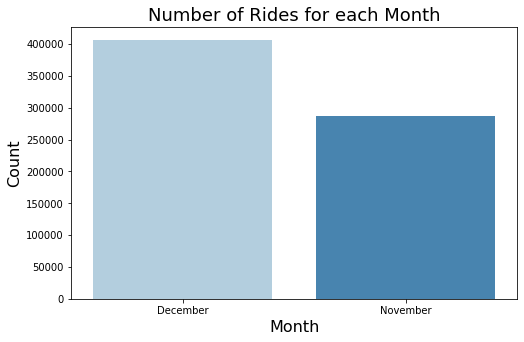

In [15]:
plt.figure(figsize=(8,5))
ax = sns.countplot(new_df['month'], palette='Blues')
plt.xlabel('Month', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Number of Rides for each Month', fontsize=18, fontweight=20)
plt.show()

In [27]:
new_df['daysoftheweek'] = pd.to_datetime(new_df['date']).dt.day_name()
days_count = new_df['daysoftheweek'].value_counts().to_frame()
days_count.index.names = ['Days']
days_count.rename(columns={'daysoftheweek':'Count'}, inplace=True)
days_count.sort_values(by='Count', ascending=False, inplace=True)
days_count

,Count
Days,
Tuesday,124949
Monday,124216
Thursday,98505
Sunday,91530
Saturday,90168
Friday,90012
Wednesday,73691


In [31]:
hours = pd.to_datetime(new_df['time'], format='%H:%M:%S').dt.hour
labels=['Morning','Afternoon','Evening','Night']
new_df['time_bins']=pd.cut(hours, bins=[0,6,12,18,24], labels=labels, include_lowest=True)
tb = new_df['time_bins'].value_counts().to_frame()
tb.index.names = ['Time_bins']
tb.rename(columns={'time_bins':'Count'}, inplace=True)
tb

,Count
Time_bins,
Morning,197998
Evening,182303
Afternoon,169334
Night,143436


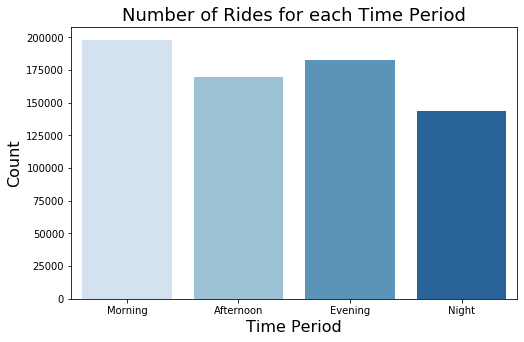

In [33]:
plt.figure(figsize=(8,5))
ax = sns.countplot(new_df['time_bins'], palette='Blues')
plt.xlabel('Time Period', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Number of Rides for each Time Period', fontsize=18, fontweight=20)
plt.show()

In [34]:
print(new_df.columns)

Index(['id', 'hour', 'day', 'month', 'datetime', 'timezone', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'temperatureHigh', 'temperatureLow',
       'apparentTemperatureHigh', 'apparentTemperatureLow', 'icon', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1',
       'ozone', 'moonPhase', 'precipIntensityMax', 'uvIndexTime',
       'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
       'apparentTemperatureMax', 'price', 'date', 'time', 'daysoftheweek',
       'time_bins'],
      dtype='object')


In [35]:
s = new_df.pop('price')
df1 = pd.concat([new_df, s],1)
df1.head()

,id,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,...,uvIndexTime,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,date,time,daysoftheweek,time_bins,price
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,December,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,...,1544979600,39.89,43.68,33.73,38.07,2018-12-16,09:30:07,Sunday,Afternoon,5.0
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,November,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,...,1543251600,40.49,47.30,36.20,43.92,2018-11-27,02:00:23,Tuesday,Morning,11.0
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,November,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,...,1543338000,35.36,47.55,31.04,44.12,2018-11-28,01:00:22,Wednesday,Morning,7.0
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,November,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,...,1543507200,34.67,45.03,30.30,38.53,2018-11-30,04:53:02,Friday,Morning,26.0
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,November,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,...,1543420800,33.10,42.18,29.11,35.75,2018-11-29,03:49:20,Thursday,Morning,9.0


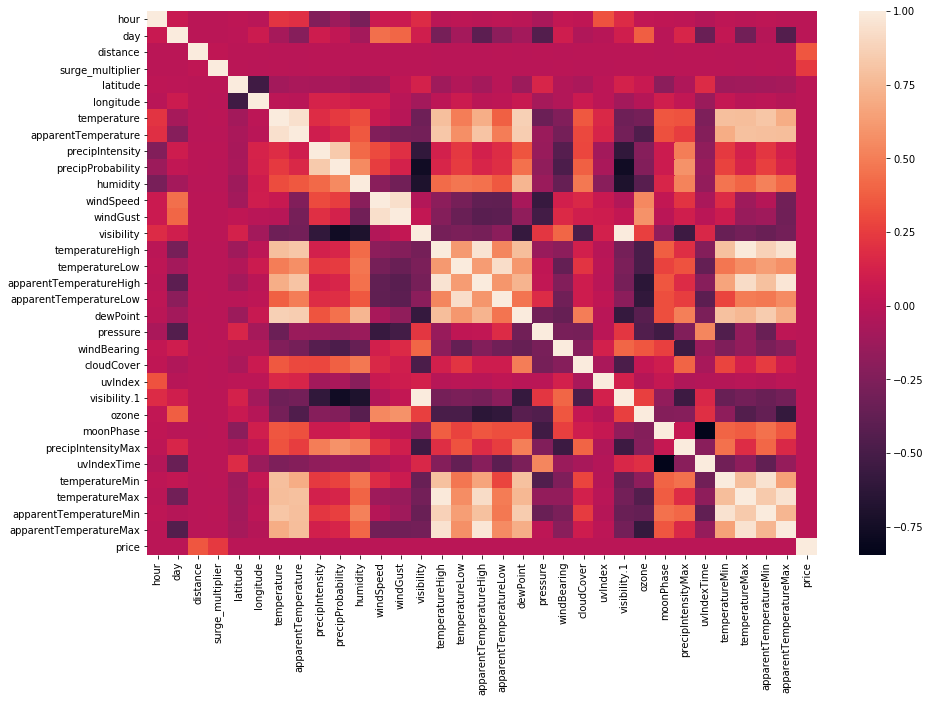

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr())

In [44]:
print(df1.columns)

Index(['id', 'hour', 'day', 'month', 'datetime', 'timezone', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'temperatureHigh', 'temperatureLow',
       'apparentTemperatureHigh', 'apparentTemperatureLow', 'icon', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1',
       'ozone', 'moonPhase', 'precipIntensityMax', 'uvIndexTime',
       'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
       'apparentTemperatureMax', 'date', 'time', 'daysoftheweek', 'time_bins',
       'price'],
      dtype='object')


In [46]:
df1['cab_type'].value_counts()

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64

In [56]:
df1['short_summary'].value_counts()

 Overcast             218895
 Mostly Cloudy        146210
 Partly Cloudy        127224
 Clear                 87126
 Light Rain            54912
 Rain                  23712
 Possible Drizzle      18636
 Foggy                  9060
 Drizzle                7296
Name: short_summary, dtype: int64

In [57]:
df1['long_summary'].value_counts()

 Mostly cloudy throughout the day.                      202340
 Partly cloudy throughout the day.                      145279
 Light rain in the morning.                             102485
 Rain throughout the day.                                54288
 Light rain in the morning and overnight.                50544
 Rain until morning, starting again in the evening.      47931
 Foggy in the morning.                                   44772
 Light rain until evening.                               35568
 Overcast throughout the day.                             7488
 Possible drizzle in the morning.                         1872
 Rain in the morning and afternoon.                        504
Name: long_summary, dtype: int64